In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
test_data=pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
train_data=pd.read_csv('/kaggle/input/titanic/train.csv')

In [4]:
test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_data.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 1. DATA PREPROCESSING

#FILL MISSING VALUES

In [9]:
# Fill missing ages with median
train_data["Age"].fillna(train_data["Age"].median(), inplace=True)
test_data["Age"].fillna(train_data["Age"].median(), inplace=True)

/tmp/ipykernel_13/2026805500.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Age"].fillna(train_data["Age"].median(), inplace=True)
/tmp/ipykernel_13/2026805500.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [10]:
# Fill missing fares
test_data["Fare"].fillna(test_data["Fare"].median(), inplace=True)

/tmp/ipykernel_13/2378955651.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data["Fare"].fillna(test_data["Fare"].median(), inplace=True)


In [11]:
train_data["Embarked"].fillna(train_data["Embarked"].mode()[0],inplace=True)

/tmp/ipykernel_13/3847382861.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Embarked"].fillna(train_data["Embarked"].mode()[0],inplace=True)


No need to fill cabing null values, as it isnot gonna be checked for predictions

# 1.2 Convert categorical variables

In [12]:
#This line converts categorical columns ("Sex" and "Embarked") into numeric format 
#using one-hot encoding, which is required for machine learning models.
train_data = pd.get_dummies(train_data, columns=["Sex", "Embarked"], drop_first=True)
test_data = pd.get_dummies(test_data, columns=["Sex", "Embarked"], drop_first=True)
#see the dataset (true false)--if we want 0 and 1 above at the end put .astype(int)                     

## 2. DEFINE FEATURES and labels

In [13]:
features = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Sex_male", "Embarked_Q", "Embarked_S"]

X = train_data[features]
y = train_data["Survived"]
X_test = test_data[features]


## 3. FIT THE MODEL

In [14]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X, y)


DecisionTreeClassifier(max_depth=5, random_state=42)

## 4. MAKE PREDICTIONS

In [15]:
predictions = model.predict(X_test)

## 5. CREATING SUBMISSION FILE

In [16]:
output = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": predictions
})

output.to_csv("submission.csv", index=False)
print("Submission file created!")


Submission file created!


## That's done, but what if you want to check the accuracy yourself? - we have to use traiun_test_split

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Use same features
X = train_data[features]
y = train_data["Survived"]

# Split data (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train Decision Tree
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict on validation set
val_predictions = model.predict(X_val)

# Evaluate
print("Accuracy:", accuracy_score(y_val, val_predictions))
print("\nClassification Report:\n", classification_report(y_val, val_predictions))


Accuracy: 0.7988826815642458

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.65      0.73        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.78       179
weighted avg       0.80      0.80      0.79       179



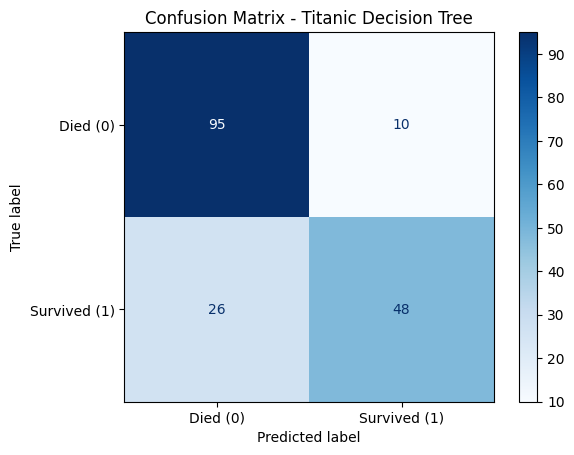

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get the confusion matrix
cm = confusion_matrix(y_val, val_predictions)

# Display the matrix as a nice plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Died (0)", "Survived (1)"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Titanic Decision Tree")
plt.show()


## WE HAVE SUCCESSFULLY DONE FOR DECISION TREE CLASSIFIER !